In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train_path = "D:/temp_files/datasets/spaceship_titanic/train.csv"
test_path = "D:/temp_files/datasets/spaceship_titanic/test.csv"
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [4]:
train['group'] = train.PassengerId.apply(lambda x: x[:4])
train.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  group         8693 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB
None


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


* PassengerId 
    
        A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

        

* HomePlanet
  
        The planet the passenger departed from, typically their planet of permanent residence.

In [7]:
temp = train.copy(deep=True)

In [8]:
temp.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [9]:
temp.HomePlanet.value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

* CryoSleep

        Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

In [10]:
temp.loc[pd.isnull(temp['CryoSleep']), ["PassengerId","CryoSleep"]]

,PassengerId,CryoSleep
92,0099_02,NaN
98,0105_01,NaN
104,0110_02,NaN
111,0115_01,NaN
152,0173_01,NaN
...,...,...
8620,9197_01,NaN
8651,9227_05,NaN
8664,9246_01,NaN
8675,9259_01,NaN


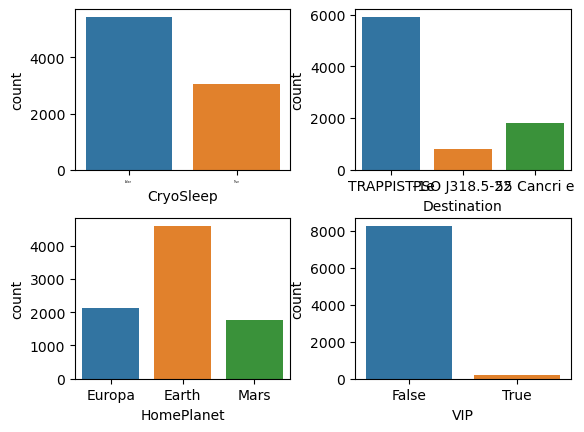

In [25]:
plt.subplots_adjust(hspace=0.3,wspace=0.3)

plt.subplot(221)
sns.countplot(data=temp, x='CryoSleep')
plt.subplot(222)
sns.countplot(data=temp, x='Destination')
plt.subplot(223)
sns.countplot(data=temp, x='HomePlanet')
plt.subplot(224)
sns.countplot(data=temp, x='VIP')
plt.show()

* Cabin

        The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [12]:
temp.Cabin.sample(10)

60         G/6/P
5506    F/1213/P
3681     F/747/S
3882         NaN
2892     B/116/S
1151     G/187/S
2091      C/83/S
261       B/12/P
5140     G/881/P
7643    G/1313/S
Name: Cabin, dtype: object


* Destination

        The planet the passenger will be debarking to.

In [13]:
temp.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

* Age

        The age of the passenger.

<AxesSubplot:xlabel='Age', ylabel='Count'>

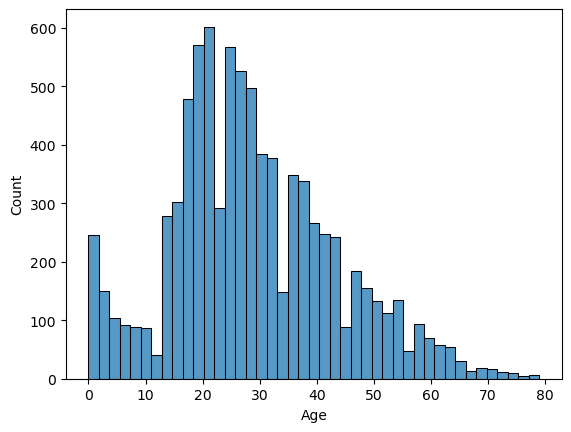

In [14]:
sns.histplot(data=temp, x=temp.Age)

* VIP

        Whether the passenger has paid for special VIP service during the voyage.

In [15]:
temp.groupby('Transported').apply(lambda x : x.VIP)

Transported      
False        0       False
             2        True
             3       False
             13      False
             15      False
                     ...  
True         8684    False
             8685    False
             8687    False
             8690    False
             8692    False
Name: VIP, Length: 8693, dtype: object

<AxesSubplot:xlabel='VIP', ylabel='count'>

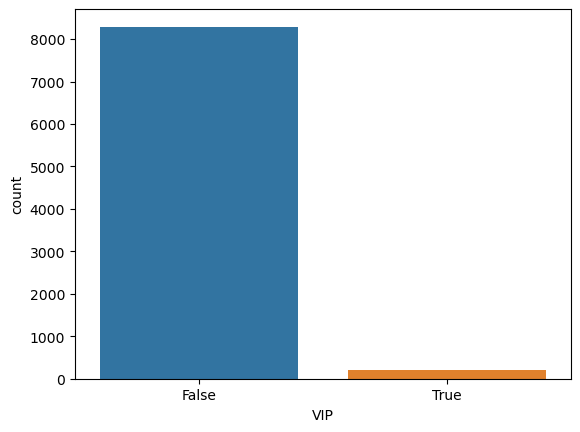

In [16]:
sns.countplot(data=temp, x='VIP')

* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck 
    
        Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

In [17]:
temp.VRDeck

0          0.0
1         44.0
2         49.0
3        193.0
4          2.0
         ...  
8688      74.0
8689       0.0
8690       0.0
8691    3235.0
8692      12.0
Name: VRDeck, Length: 8693, dtype: float64

* Name

        The first and last names of the passenger.

In [18]:
temp.Name.head()

0      Maham Ofracculy
1         Juanna Vines
2        Altark Susent
3         Solam Susent
4    Willy Santantines
Name: Name, dtype: object

* Transported
    
        Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

<AxesSubplot:xlabel='Transported', ylabel='count'>

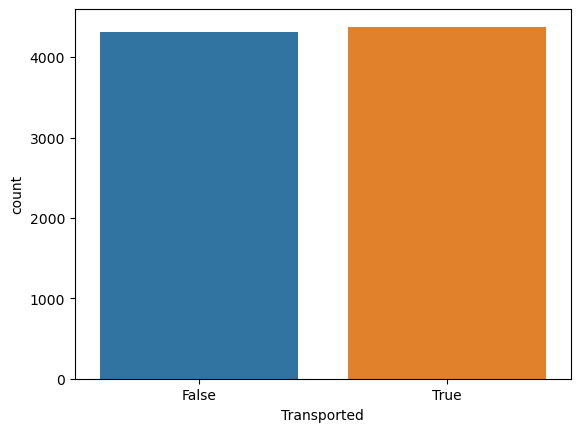

In [19]:
sns.countplot(data=temp, x='Transported')